In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_3/'

/content/gdrive/My Drive/LDS8_K270_ONLINE_DoThiPhuong/LDS8_K270_DoThiPhuong_Cuoi_ky/Cau_3


In [ ]:
# Importing the Keras libraries and other packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from datetime import datetime
import pandas as pd
from tensorflow.keras.utils import plot_model
from IPython.display import Image
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

# Bước 1: Build the CNN

In [ ]:
# initialising the CNN
classifier = Sequential()

In [ ]:
# Step 1 -  Convolution
classifier.add(Conv2D(filters= 32, kernel_size= 3,
                      input_shape = (64, 64, 3), activation ='relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
# adding a second convolutional layer
classifier.add(Conv2D(filters= 32, kernel_size=3, activation='relu'))
classifier.add(MaxPooling2D(pool_size= (2,2)))

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation= 'relu'))
classifier.add(Dense(units= 1, activation= 'sigmoid'))

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
# Compiling the CNN
classifier.compile(optimizer= 'adam',
                   loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                                 target_size = (64,64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.


In [ ]:
callbacks = [EarlyStopping(monitor= 'val_loss',
                           patience =20),
            ModelCheckpoint('model_ckeckpoint_lion_tiger.h5',
                            save_best_only = True)]

In [ ]:
d1 = datetime.now()

In [ ]:
history = classifier.fit(training_set,
                         epochs = 100,
                         validation_data = test_set,
                         callbacks = callbacks
    
)

Epoch 1/100
200/200 [==============================] - 2131s 11s/step - loss: 0.4285 - accuracy: 0.7923 - val_loss: 0.9388 - val_accuracy: 0.6844
Epoch 2/100
200/200 [==============================] - 85s 425ms/step - loss: 0.2539 - accuracy: 0.8998 - val_loss: 0.6043 - val_accuracy: 0.7800
Epoch 3/100
200/200 [==============================] - 84s 423ms/step - loss: 0.2422 - accuracy: 0.9020 - val_loss: 0.9270 - val_accuracy: 0.7006
Epoch 4/100
200/200 [==============================] - 84s 422ms/step - loss: 0.2072 - accuracy: 0.9170 - val_loss: 1.2159 - val_accuracy: 0.6419
Epoch 5/100
200/200 [==============================] - 83s 415ms/step - loss: 0.2021 - accuracy: 0.9205 - val_loss: 0.8645 - val_accuracy: 0.6956
Epoch 6/100
200/200 [==============================] - 83s 417ms/step - loss: 0.1855 - accuracy: 0.9278 - val_loss: 0.3515 - val_accuracy: 0.8650
Epoch 7/100
200/200 [==============================] - 85s 424ms/step - loss: 0.2013 - accuracy: 0.9220 - val_loss: 1.9042 -

In [ ]:
d2 = datetime.now()

In [ ]:
print(d2-d1)

2:11:50.504998


In [ ]:
history_frame = pd.DataFrame(history.history)

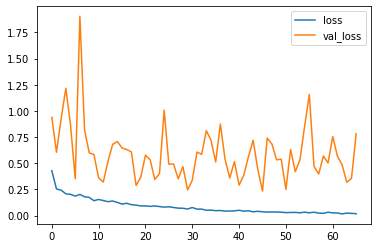

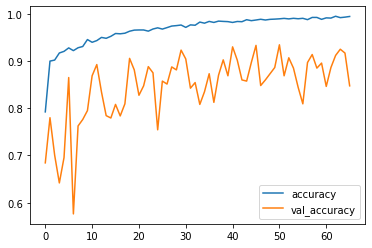

In [ ]:
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [ ]:
history_frame.tail()

,loss,accuracy,val_loss,val_accuracy
61,0.023736,0.990937,0.566784,0.886250
62,0.015135,0.994844,0.484603,0.911875
63,0.022703,0.991875,0.317262,0.925000
64,0.020253,0.992969,0.354746,0.916875
65,0.017328,0.994375,0.780449,0.847500


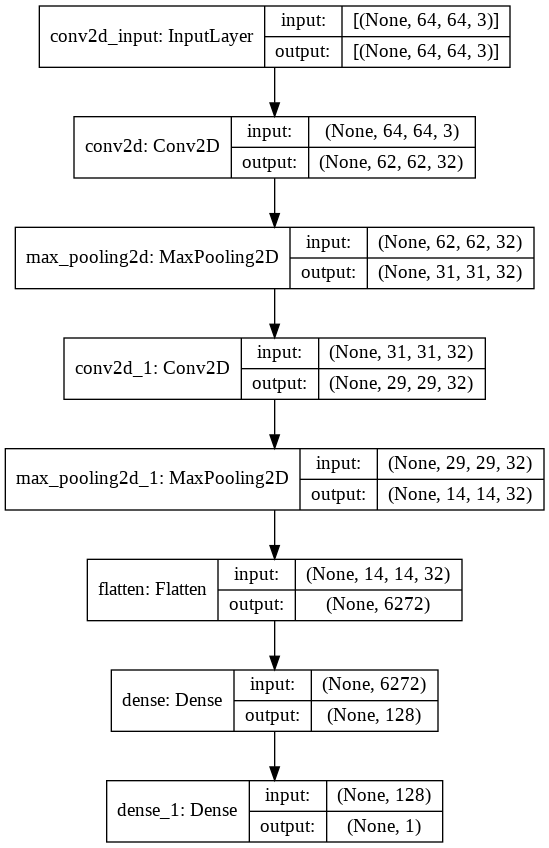

In [ ]:
plot_model(classifier, to_file='CNN_model_lion_tiger.png', show_shapes=True)
Image(filename='CNN_model_lion_tiger.png')

In [ ]:
# save model
from tensorflow.keras.models import load_model
# creates a HDF5 file 'my_model_CNN_new.h5'
classifier.save('my_model_CNN_lion_tiger.h5')
print('Save!')

Save!
